In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.environ["CUDA_DIR"] = "/opt/cuda"

In [3]:
# load, average and merge sensor samples
data_dir = '../data/ERC2023/'
train = pd.DataFrame()
train = pd.read_csv('../data/ERC2023/data_set_AG_1.csv')

# for filename in os.listdir(data_dir):
#     dataset = pd.read_csv(os.path.join(data_dir, filename), sep='\t')
#     dataset_mean_abs = np.array(dataset.abs().mean())
#     dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
#     dataset_mean_abs.index = [filename]
#     # train = train.append(dataset_mean_abs)
#     train = pd.concat([train, dataset_mean_abs])
    
# train.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']
# #train.head()

In [4]:
train

,type,sender,to,approveAmount,transferAmount,transferFromAmount,oldApproveState,newApproveState,oldBalanceState,newBalanceState,success
0,transferFrom,0xa4c9a75fee195537bb69a7a176d308af348a4333,0xdd39328a2ffe0c7bc368cc00429f3cecd58a277d,0.000000e+00,0.000000e+00,2.470000e+09,2.470000e+09,0.000000e+00,7.050000e+09,4.580000e+09,True
1,transfer,0x6b95f1248f1dd0b27bf3b8cc7fa42bcb4c055807,0x5e27253b2799b0ab9e34683a31493ea8bddf2c0d,0.000000e+00,2.030000e+09,0.000000e+00,5.350000e+09,5.350000e+09,1.366000e+10,1.163000e+10,True
2,transferFrom,0x29cf0fd60915fb5e1a5580f37ccafb7943f0724a,0x32e056bc2befccd905228ce145503b0021564e25,0.000000e+00,0.000000e+00,8.390000e+09,8.570000e+09,1.800000e+08,1.452000e+10,6.130000e+09,True
3,transferFrom,0x34572c56ae4fffa97c82cdf4659d07887ce21e8a,0x8efea814f08197f9916fc015ac1906f7b85f6070,0.000000e+00,0.000000e+00,9.700000e+09,9.430000e+09,9.430000e+09,1.381000e+10,1.381000e+10,False
4,approve,0x5164d5783e6ee3b1a56e89a811c64be212a8dd56,0x6209db592f07fe1b29f7d16be6ede2b5f6776d94,4.620000e+09,0.000000e+00,0.000000e+00,7.970000e+09,1.259000e+10,1.393000e+10,1.393000e+10,True
...,...,...,...,...,...,...,...,...,...,...,...
995,transfer,0x971d6906faeabccb4d7d2ebb0227a6f0fc651a70,0x97e7aacc34620ace256e5e18f1e3eeffc6753ce3,0.000000e+00,5.970000e+09,0.000000e+00,8.020000e+09,8.020000e+09,7.790000e+09,1.820000e+09,True
996,transfer,0x335dd914f0a81bb439ff07bd5dac9b5dd72e4269,0x19df7263353926b3217b19177ae7a2ce87712cb6,0.000000e+00,2.790000e+09,0.000000e+00,5.320000e+09,5.320000e+09,6.940000e+09,4.150000e+09,True
997,transferFrom,0xc52eb62ba32967d839988d7cc9106184e0e4d865,0xaabad07f79f5b4df6fa46ee0cec7a338e03dbd3a,0.000000e+00,0.000000e+00,4.620000e+09,5.210000e+09,5.900000e+08,5.050000e+09,4.300000e+08,True
998,approve,0x692e57c5adeb53936adbd35fc9a407a87b6cedd3,0x575f11528e63d74bb28c1c992901ec7c2ad1daff,4.640000e+09,0.000000e+00,0.000000e+00,7.940000e+09,1.258000e+10,8.040000e+09,8.040000e+09,True


In [5]:
# from_cumm = dict()
# print(from_cumm)


In [6]:
type_replace = {"transfer": float(0), "transferFrom": float(1), "approve": float(2)}
train_type_replaced = train.replace(type_replace)

In [7]:
train_type_replaced.dtypes

type                  float64
sender                 object
to                     object
approveAmount         float64
transferAmount        float64
transferFromAmount    float64
oldApproveState       float64
newApproveState       float64
oldBalanceState       float64
newBalanceState       float64
success                  bool
dtype: object

In [8]:
train = train_type_replaced.drop(columns=['to', 'sender'], axis=1)

In [9]:
train

,type,approveAmount,transferAmount,transferFromAmount,oldApproveState,newApproveState,oldBalanceState,newBalanceState,success
0,1.0,0.000000e+00,0.000000e+00,2.470000e+09,2.470000e+09,0.000000e+00,7.050000e+09,4.580000e+09,True
1,0.0,0.000000e+00,2.030000e+09,0.000000e+00,5.350000e+09,5.350000e+09,1.366000e+10,1.163000e+10,True
2,1.0,0.000000e+00,0.000000e+00,8.390000e+09,8.570000e+09,1.800000e+08,1.452000e+10,6.130000e+09,True
3,1.0,0.000000e+00,0.000000e+00,9.700000e+09,9.430000e+09,9.430000e+09,1.381000e+10,1.381000e+10,False
4,2.0,4.620000e+09,0.000000e+00,0.000000e+00,7.970000e+09,1.259000e+10,1.393000e+10,1.393000e+10,True
...,...,...,...,...,...,...,...,...,...
995,0.0,0.000000e+00,5.970000e+09,0.000000e+00,8.020000e+09,8.020000e+09,7.790000e+09,1.820000e+09,True
996,0.0,0.000000e+00,2.790000e+09,0.000000e+00,5.320000e+09,5.320000e+09,6.940000e+09,4.150000e+09,True
997,1.0,0.000000e+00,0.000000e+00,4.620000e+09,5.210000e+09,5.900000e+08,5.050000e+09,4.300000e+08,True
998,2.0,4.640000e+09,0.000000e+00,0.000000e+00,7.940000e+09,1.258000e+10,8.040000e+09,8.040000e+09,True


In [10]:
train.dtypes

type                  float64
approveAmount         float64
transferAmount        float64
transferFromAmount    float64
oldApproveState       float64
newApproveState       float64
oldBalanceState       float64
newBalanceState       float64
success                  bool
dtype: object

In [11]:
# # transform data file index to datetime and sort in chronological order
# train.index = pd.to_datetime(train.index, format='%Y.%m.%d.%H.%M.%S')
# train = train.sort_index()
# train.to_csv('Averaged_BearingTest_Dataset.csv')
# print("Dataset shape:", train.shape)
train.head()

,type,approveAmount,transferAmount,transferFromAmount,oldApproveState,newApproveState,oldBalanceState,newBalanceState,success
0,1.0,0.000000e+00,0.000000e+00,2.470000e+09,2.470000e+09,0.000000e+00,7.050000e+09,4.580000e+09,True
1,0.0,0.000000e+00,2.030000e+09,0.000000e+00,5.350000e+09,5.350000e+09,1.366000e+10,1.163000e+10,True
2,1.0,0.000000e+00,0.000000e+00,8.390000e+09,8.570000e+09,1.800000e+08,1.452000e+10,6.130000e+09,True
3,1.0,0.000000e+00,0.000000e+00,9.700000e+09,9.430000e+09,9.430000e+09,1.381000e+10,1.381000e+10,False
4,2.0,4.620000e+09,0.000000e+00,0.000000e+00,7.970000e+09,1.259000e+10,1.393000e+10,1.393000e+10,True


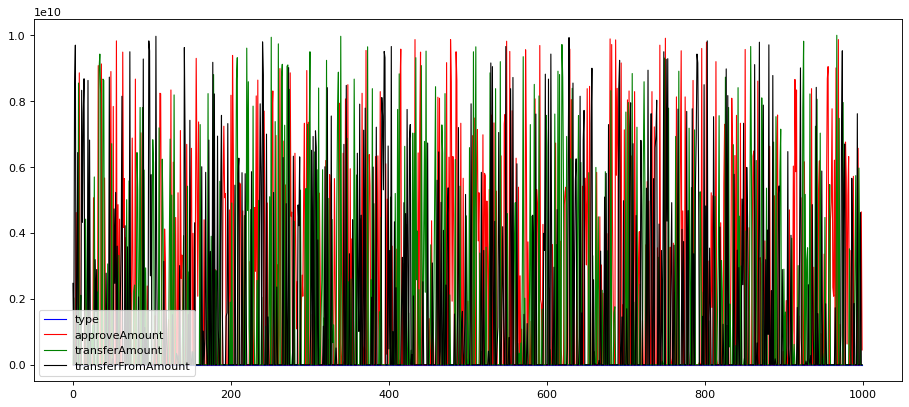

In [12]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train['type'], label='type', color='blue', animated = True, linewidth=1)
ax.plot(train['approveAmount'], label='approveAmount', color='red', animated = True, linewidth=1)
ax.plot(train['transferAmount'], label='transferAmount', color='green', animated = True, linewidth=1)
ax.plot(train['transferFromAmount'], label='transferFromAmount', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
# ax.set_title('Bearing Sensor Training Data', fontsize=16)
plt.show()

In [13]:
# transforming data from the time domain to the frequency domain using fast Fourier transform
# train_fft = np.fft.fft(train)


In [14]:
# fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
# ax.plot(train_fft[:,0].real, label='Bearing 1', color='blue', animated = True, linewidth=1)
# ax.plot(train_fft[:,1].imag, label='Bearing 2', color='red', animated = True, linewidth=1)
# ax.plot(train_fft[:,2].real, label='Bearing 3', color='green', animated = True, linewidth=1)
# ax.plot(train_fft[:,3].real, label='Bearing 4', color='black', animated = True, linewidth=1)
# plt.legend(loc='lower left')
# ax.set_title('Bearing Sensor Training Frequency Data', fontsize=16)
# plt.show()

In [15]:
# normalize the data

from sklearn.preprocessing import MinMaxScaler
import joblib
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train)
# X_test = scaler.transform(test)
scaler_filename = "scaler_data"
joblib.dump(scaler, scaler_filename)

['scaler_data']

In [16]:
X_train.shape

(1000, 9)

In [17]:
def generate_sequence(data, sequence_length):
	seq_data = []
	# print(seq_data)
	for i in range(len(data)- sequence_length+1):
		seq = data[ i : i+sequence_length ]
		# print(seq)
		seq_data.append(seq)

	# print(seq_data)
	return np.array(seq_data)

In [18]:
SEQUENCE_LENGTH = 10

a = generate_sequence(X_train, SEQUENCE_LENGTH)

In [19]:
X_train.shape

(1000, 9)

In [20]:
print(a.shape)

(991, 10, 9)


In [21]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Input, Dense, RepeatVector, TimeDistributed

2023-04-20 14:50:59.135241: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 14:50:59.913555: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-20 14:50:59.913634: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-04-20 14:50:59.913642: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [22]:
model = Sequential()
model.add(Input(shape=(a.shape[1], a.shape[2])))
model.add(CuDNNLSTM(64, return_sequences=True  ))
model.add(CuDNNLSTM(SEQUENCE_LENGTH, return_sequences=False ))
model.add(Dense(SEQUENCE_LENGTH))
model.add(RepeatVector(SEQUENCE_LENGTH))
model.add(CuDNNLSTM(SEQUENCE_LENGTH, return_sequences=True ))
model.add(CuDNNLSTM(64, return_sequences=True  ))
model.add(TimeDistributed(Dense(a.shape[2])))

2023-04-20 14:51:00.476800: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-20 14:51:00.491075: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-20 14:51:00.491273: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-20 14:51:00.491752: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [23]:
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm (CuDNNLSTM)      (None, 10, 64)            19200     
                                                                 
 cu_dnnlstm_1 (CuDNNLSTM)    (None, 10)                3040      
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 repeat_vector (RepeatVector  (None, 10, 10)           0         
 )                                                               
                                                                 
 cu_dnnlstm_2 (CuDNNLSTM)    (None, 10, 10)            880       
                                                                 
 cu_dnnlstm_3 (CuDNNLSTM)    (None, 10, 64)            19456     
                                                        

In [24]:
history = model.fit(a, a, epochs=3, batch_size=1, validation_split=0.05, ).history

Epoch 1/3


2023-04-20 14:51:04.109741: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8600
2023-04-20 14:51:04.365216: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fb051a39ff0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-20 14:51:04.365237: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-04-20 14:51:04.369117: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-04-20 14:51:04.477824: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


941/941 [==============================] - 9s 4ms/step - loss: 0.1996 - val_loss: 0.1875
Epoch 2/3
941/941 [==============================] - 4s 4ms/step - loss: 0.1877 - val_loss: 0.1851
Epoch 3/3
941/941 [==============================] - 4s 4ms/step - loss: 0.1874 - val_loss: 0.1852


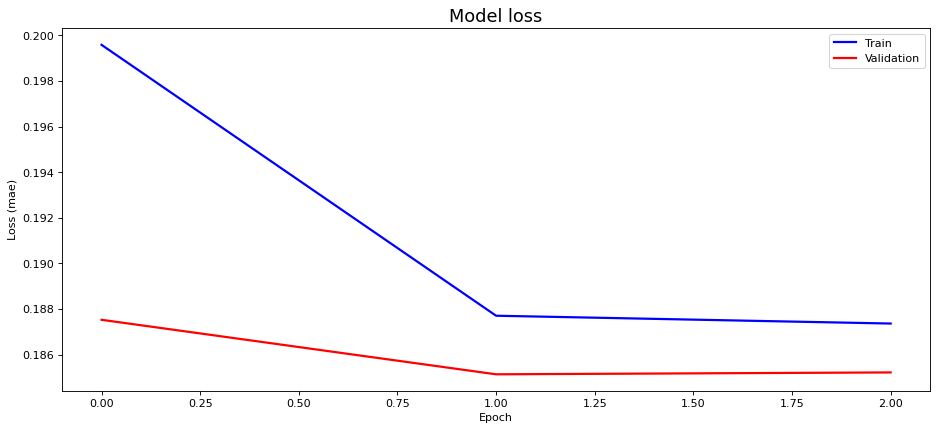

In [25]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [26]:
test = pd.read_csv('../data/ERC2023/data_set_MAL_1.csv')

In [27]:
test_type_replaced = test.replace(type_replace)

In [28]:
test_type_replaced.dtypes

type                  float64
sender                 object
to                     object
approveAmount         float64
transferAmount        float64
transferFromAmount    float64
oldApproveState       float64
newApproveState       float64
oldBalanceState       float64
newBalanceState       float64
success                  bool
dtype: object

In [29]:
test = test_type_replaced.drop(columns=['to', 'sender'], axis=1)

In [30]:
test.dtypes

type                  float64
approveAmount         float64
transferAmount        float64
transferFromAmount    float64
oldApproveState       float64
newApproveState       float64
oldBalanceState       float64
newBalanceState       float64
success                  bool
dtype: object

In [31]:
X_test = scaler.transform(test)

In [32]:
X_test.shape

(1000, 9)

In [33]:
b = generate_sequence(X_test, SEQUENCE_LENGTH)

In [34]:
print(b.shape)

(991, 10, 9)


In [35]:
b_pred = model.predict(b)

31/31 [==============================] - 0s 2ms/step


In [36]:
b.shape

(991, 10, 9)

In [37]:
b_pred.shape

(991, 10, 9)

In [38]:
loss = np.mean(np.abs(b_pred-b), axis = 1)

In [39]:
loss.shape

(991, 9)

In [40]:
combined_loss_b = np.sum(loss, axis=1)

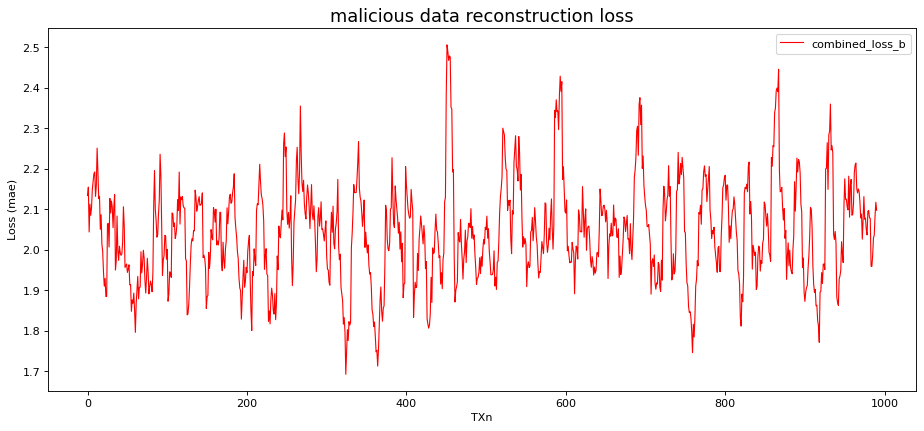

In [41]:
# natural numbering of the bearings
# BEARINGNUMBER = 1
# BEARINGNUMBER_WHOLE = BEARINGNUMBER - 1
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)

ax.plot(combined_loss_b, 'r', label=f'combined_loss_b', linewidth=1)

ax.set_title('malicious data reconstruction loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('TXn')
ax.legend(loc='upper right')
# plt.ylim(0, 1)
plt.show()

In [42]:
a_pred = model.predict(a)

31/31 [==============================] - 0s 2ms/step


In [43]:
loss_a = np.mean(np.abs(a_pred - a), axis = 1)

In [44]:
combined_loss_a = np.sum(loss_a, axis=1)

In [45]:
# loss_a[:, 1]

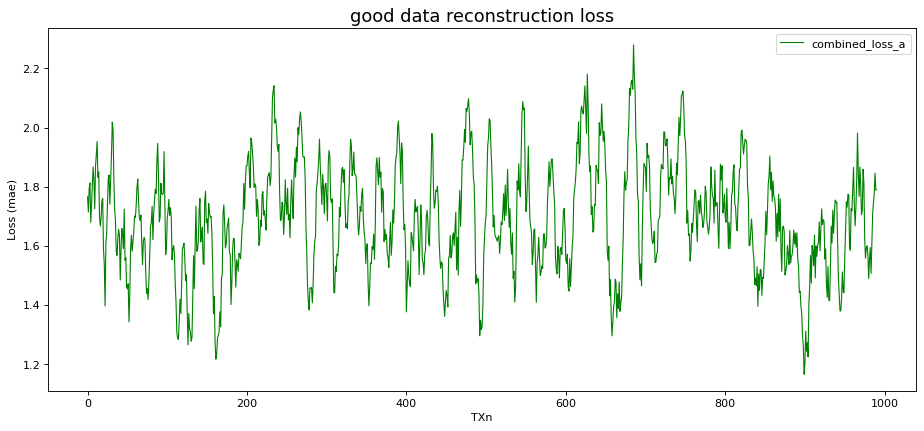

In [46]:
# natural numbering of the bearings
# BEARINGNUMBER = 1
# BEARINGNUMBER_WHOLE = BEARINGNUMBER - 1
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)

ax.plot(combined_loss_a, 'g', label=f'combined_loss_a', linewidth=1)

ax.set_title('good data reconstruction loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('TXn')
ax.legend(loc='upper right')
# plt.ylim(0, 1)
plt.show()

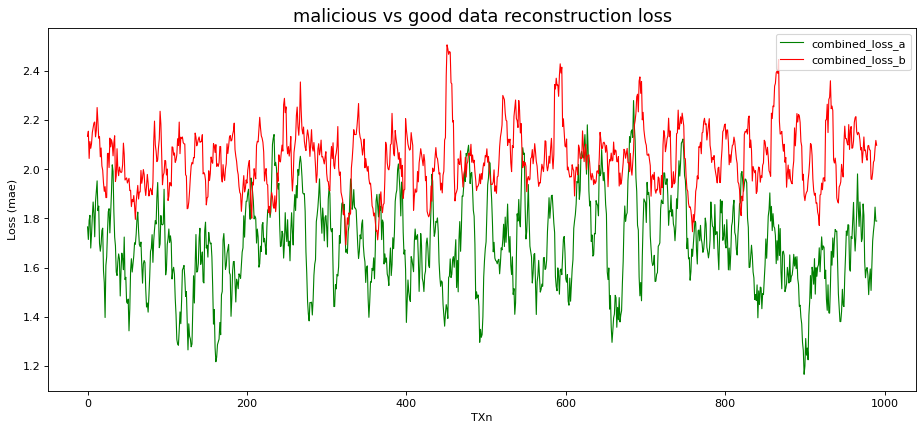

In [47]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)

ax.plot(combined_loss_a, 'g', label=f'combined_loss_a', linewidth=1)
ax.plot(combined_loss_b, 'r', label=f'combined_loss_b', linewidth=1)

ax.set_title('malicious vs good data reconstruction loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('TXn')
ax.legend(loc='upper right')
# plt.ylim(0, 1)
plt.show()